In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the train and test data

Train_data=pd.read_excel("E:\Datasets\Data_Train.xlsx")
Test_data=pd.read_excel("E:\Datasets\Test_set.xlsx")

In [3]:
#Displaying all the columns
pd.set_option('display.max_columns',None)

In [4]:
#Seeing the first five rows of training data
Train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
#Seeing the first five row of test data
Test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
#Checking the shape of train and test data

print('Train_data:',Train_data.shape)
print('\n')
print('Test_data:',Test_data.shape)

Train_data: (10683, 11)


Test_data: (2671, 10)


Now from here we first Analyze the Train data set and the same process is repeated for test dataset. If we concat train and test data then there is a problem of data leakage. So for that reason we do not combine out dataset and analyze the dataset separately.

# Train Data

In [7]:
#Checking the shape of train data
Train_data.shape

(10683, 11)

In [8]:
#Checking the columns of train data
Train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
#Checking for any null values
Train_data.isnull().values.any()

True

In [10]:
#Checking the null value in columns
Train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

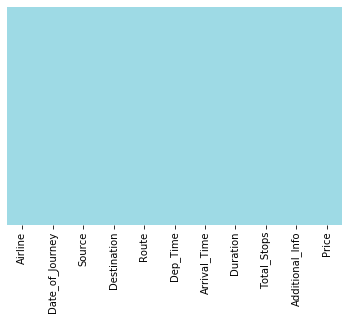

In [11]:
#Now again checking it via visualization
sns.heatmap(Train_data.isnull(),yticklabels=False,cbar=False,cmap='tab20_r')
plt.show()

Observation: Only one value is null in Route column and Total_Stops column. So instead of filling them we can drop it.

In [12]:
#Dropping the null values
Train_data.dropna(inplace=True)

In [13]:
#Now again checking for null values
Train_data.isnull().values.any()

False

In [14]:
#Checking the null values in columns
Train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [15]:
#Now checking the shape
Train_data.shape

(10682, 11)

In [16]:
#Checking teh information about Train dataset
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


Observations:
1. All the columns are object datatype except Price column which is integer datatype and out independent variable.
2. Before going further, we have to change the datatype of columns which have object datatype and also we have to change the value inside these columns because our model does not understand these string values.

# Summary Statistics

In [17]:
Train_data.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Observations:
1. The minimum price of flight is 1759 rupees and maximum is 79512 rupees.
2. Mean is greater than median thats why Price column is right-skewed.

# Exploratory Data Analysis

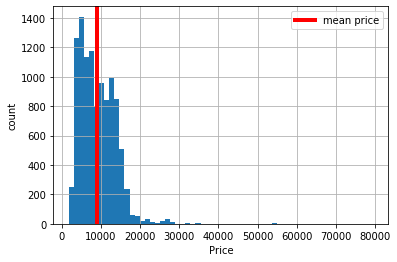

In [18]:
#Checking the mean price.

price=Train_data['Price'].hist(bins=60)
mean_val=np.mean(Train_data['Price'])
plt.axvline(mean_val,linewidth=4,color='red',label='mean price')
plt.xlabel('Price')
plt.ylabel('count')
plt.legend()
plt.show()

From description, we can see that Date_of_Journey is a object data type, therefore we have to convert this data type into timestamp so we use this column for proper prediction.

In [19]:
#Checking the unique value in journey data column.
Train_data['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

Here from date of journey all the data are from the year 2019, so, we cannot create separate column for year.

In [20]:
#Making the new column Journey date
Train_data['Journey_date']=pd.to_datetime(Train_data['Date_of_Journey'],format='%d/%m/%Y').dt.day

In [21]:
#Making the new column Journey month
Train_data['Journey_month']=pd.to_datetime(Train_data['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [22]:
#Now after making the new columns here we check the first five rows of the train data.
Train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [23]:
# Now we dropping Date_of_Journey because we have converted this column into integers and as it is of no use.
Train_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [24]:
#Now we convery Departure time.
#Departure time is the time when a plane leaves the source airport.
#Similarly we can extract the values from Dep_Time as we fetch the values from Date_of_Journey.

#Fetching Hours
Train_data['Dep_hour']=pd.to_datetime(Train_data['Dep_Time']).dt.hour

#Fetching Minutes
Train_data['Dep_min']=pd.to_datetime(Train_data['Dep_Time']).dt.minute

#Now we can drop Dep_Time as it is of no use

Train_data.drop(['Dep_Time'],axis=1,inplace=True)

In [25]:
#Now again checking the train data after making the new columns that is Dep_Hours and Dep_min.
Train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [26]:
#Now we convery Arrival time.
#Arrival time is the time when a plane reaches the destination airport.
#Similarly we can extract the values from Arrival_Time as we fetch the values from Date_of_Journey and Dep_Time.

#Fetching Hours
Train_data['Arrival_hour']=pd.to_datetime(Train_data['Arrival_Time']).dt.hour

#Fetching Minutes
Train_data['Arrival_min']=pd.to_datetime(Train_data['Arrival_Time']).dt.minute

#Now we can drop Arrival_Time as it is of no use

Train_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [27]:
#After making new columns Arrival_hour and Arrival_min here we check the first five rows of the train dataset.
Train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [28]:
# Now we convert Duration.
#Duration is the time taken by plane to reach the destination.
#It is the difference between Departure Time and Arrival Time.

#use same process as above code or use the following code

In [29]:
#Assigning and converting Duration column into list
duration=list(Train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) !=2: # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+ " 0m" # Adds 0 minute
        else:
            duration[i]= "0h " + duration[i]   # Adds 0 hours
            
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep= "h")[0]))     # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))   # Extracts only minutes from duration.

#Adding duration hours and duration minute list to train_data

Train_data['Duration_hours']=duration_hours
Train_data['Duration_mins']=duration_mins

In [30]:
#Now checking the train data
Train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [31]:
#Dropping Duration column as it has no use
Train_data.drop(["Duration"],axis=1,inplace=True)

In [32]:
Train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Airline vs Price

In [33]:
print(Train_data['Airline'].value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


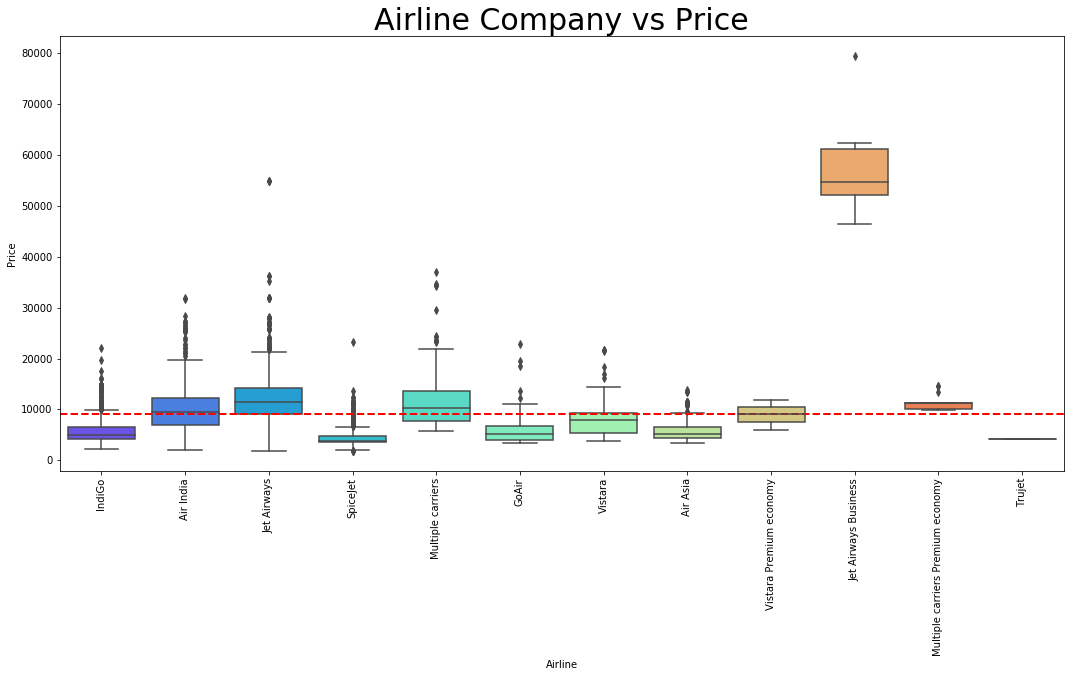

In [34]:
#Airline vs Price
plt.figure(figsize=(18,8))
mean_price=np.mean(Train_data['Price'])
sns.boxplot(y='Price',x='Airline',data=Train_data,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("Airline Company vs Price",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

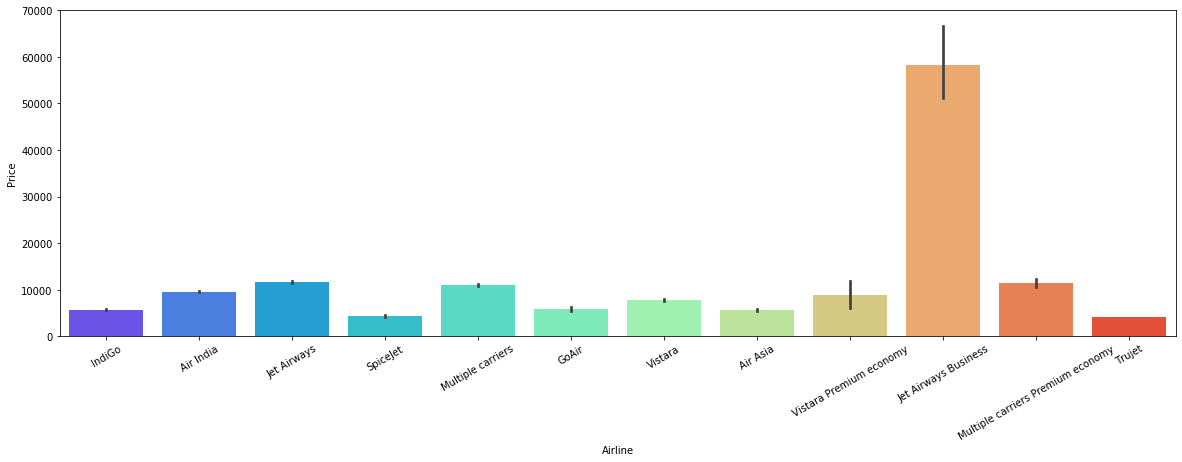

In [35]:
plt.figure(figsize=(20,6))
sns.barplot(x='Airline',y='Price',data=Train_data,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

Observation: From above graph we can see that Jet Airways Business has the highest price. We can also remove it as Jet Airways is closed.

# Source vs Price

In [36]:
print(Train_data['Source'].value_counts())

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


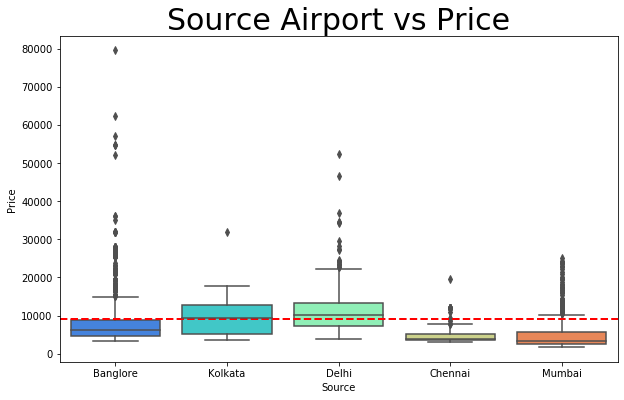

In [37]:
#Airline vs Price
plt.figure(figsize=(10,6))
mean_price=np.mean(Train_data['Price'])
sns.boxplot(y='Price',x='Source',data=Train_data,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("Source Airport vs Price",fontsize=30)
plt.xticks(rotation='0')
plt.show()

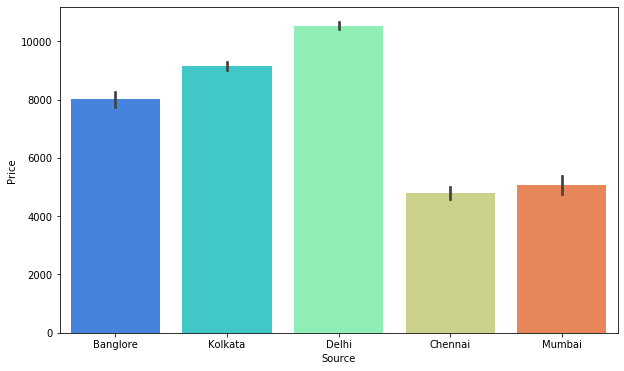

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x='Source',y='Price',data=Train_data,palette='rainbow')
plt.xticks(rotation=0)
plt.show()

Observation: From Delhi price of Flight is very high.

But from Banglore some tickets price is too high which may be outliers.

In [39]:
print(Train_data['Destination'].value_counts())

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


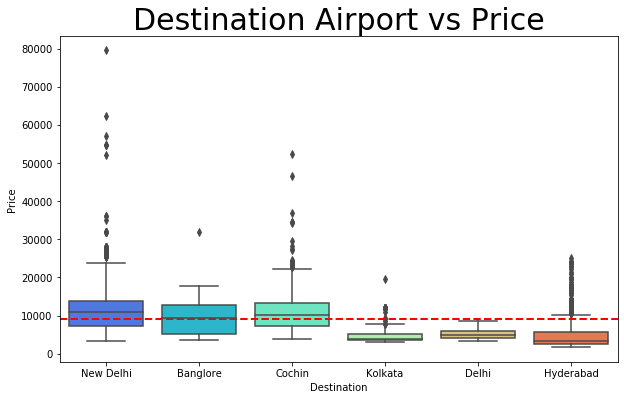

In [40]:
#Airline vs price
plt.figure(figsize=(10,6))
mean_price=np.mean(Train_data['Price'])
sns.boxplot(y='Price',x='Destination',data=Train_data,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("Destination Airport vs Price",fontsize=30)
plt.xticks(rotation='0')
plt.show()

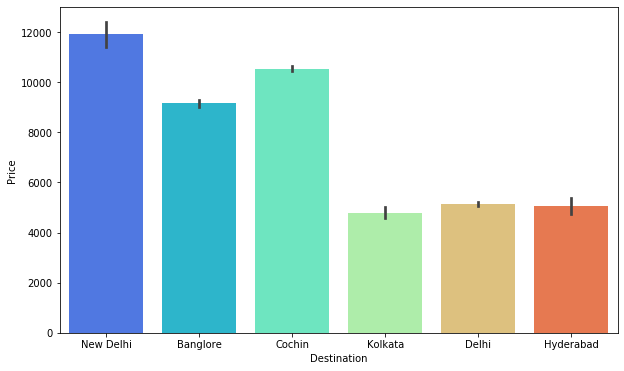

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x='Destination',y='Price',data=Train_data,palette='rainbow')
plt.xticks(rotation=0)
plt.show()

Observation: The maximum fare is for New Delhi.

# Total stop vs Price

In [42]:
print(Train_data['Total_Stops'].value_counts())

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


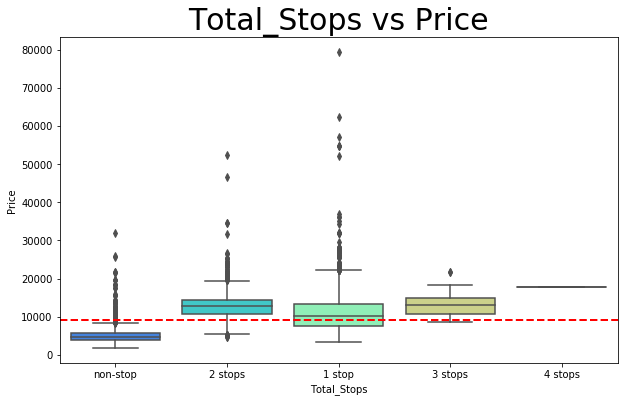

In [43]:
#Total_Stops vs Price
plt.figure(figsize=(10,6))
mean_price=np.mean(Train_data['Price'])
sns.boxplot(y='Price',x='Total_Stops',data=Train_data,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("Total_Stops vs Price",fontsize=30)
plt.xticks(rotation='0')
plt.show()

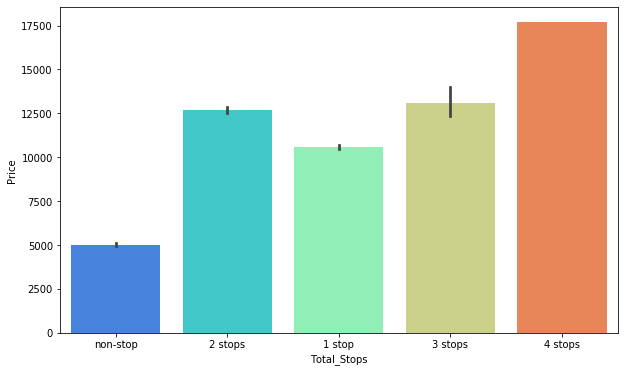

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x='Total_Stops',y='Price',data=Train_data,palette='rainbow')
plt.xticks(rotation=0)
plt.show()

# Handling Categorical Data

Using OneHotEncoding to convert the Airline,Source,Destination column because it is nominal categorical data.

In [45]:
#Converting Airline column
Airline=Train_data['Airline']
Airline=pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [46]:
#Converting Source column
Source=Train_data['Source']
Source=pd.get_dummies(Source, drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [47]:
#Converting Airline column
Destination=Train_data['Destination']
Destination=pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [48]:
#We can drop some of the columns
Train_data.drop(['Route','Additional_Info'],axis=1, inplace=True)

In [49]:
Train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [50]:
#Now we have to convert Total_Stop
Train_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
Train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [51]:
#Adding Airline, Source, Destination column into Train dataset

train=pd.concat([Train_data, Airline, Source, Destination],axis=1)

In [52]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [53]:
#Now dropping some columns that is Airline, Source, Destination
train.drop(['Airline','Source','Destination'],axis=1,inplace=True)
train.head()

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [54]:
train.shape

(10682, 30)

# Now all the columns are changed into numeric data type now same steps are to be followed in test data.

# Test Data

In [55]:
#Preprocessing

print('Test data info')
print("*"*85)
print(Test_data.info())

print('\n')

print('Null Values :')
print("*" * 85)
Test_data.dropna(inplace=True)
print(Test_data.isnull().values.any())
print('\n')
print(Test_data.isnull().sum())

print('\n')

#EDA

#Date_of_Journey
Test_data['Journey_date']=pd.to_datetime(Test_data['Date_of_Journey'],format='%d/%m/%Y').dt.day
Test_data['Journey_month']=pd.to_datetime(Test_data['Date_of_Journey'],format='%d/%m/%Y').dt.month
Test_data.drop(['Date_of_Journey'],axis=1,inplace=True)

#Dep_Time
Test_data['Dep_hour']=pd.to_datetime(Test_data['Dep_Time']).dt.hour
Test_data['Dep_min']=pd.to_datetime(Test_data['Dep_Time']).dt.minute
Test_data.drop(['Dep_Time'],axis=1,inplace=True)

#Arrival_Time
Test_data['Arrival_hour']=pd.to_datetime(Test_data['Arrival_Time']).dt.hour
Test_data['Arrival_min']=pd.to_datetime(Test_data['Arrival_Time']).dt.minute
Test_data.drop(['Arrival_Time'],axis=1,inplace=True)

#Duration
duration=list(Test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) !=2: # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+ " 0m" # Adds 0 minute
        else:
            duration[i]= "0h " + duration[i]   # Adds 0 hours
            
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep= "h")[0]))     # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))   # Extracts only minutes from duration.

#Adding duration hours and duration minute list to Test_data

Test_data['Duration_hours']=duration_hours
Test_data['Duration_mins']=duration_mins
Test_data.drop(['Duration'],axis=1,inplace=True)

# Categorical data
print("Airline")
print("*"*85)
print(Test_data["Airline"].value_counts())
Airline=pd.get_dummies(Test_data["Airline"],drop_first=True)

print()

print("Source")
print("*"*85)
print(Test_data["Source"].value_counts())
source= pd.get_dummies(Test_data["Source"],drop_first=True)

print()

print("Destination")
print("*"*85)
print(Test_data["Destination"].value_counts())
Destination= pd.get_dummies(Test_data["Destination"],drop_first=True)

#Now we have to convert Total_Stop
print("Total_Stops")
print("*"*85)
print(Test_data["Total_Stops"].value_counts())
Test_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

#Adding our Airline,Source,Destination column into Test dataset
test=pd.concat([Test_data, Airline, Source, Destination],axis=1)

# Now dropping some columns that is Airline, Source, Destination
test.drop(['Route','Additional_Info','Airline','Source','Destination'],axis=1, inplace=True)
test.head()

Test data info
*************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null Values :
*************************************************************************************
False


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route     

,Total_Stops,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1.0,6.0,6.0,17.0,30.0,4.0,25.0,10.0,55.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
1,1.0,12.0,5.0,6.0,20.0,10.0,20.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
2,1.0,21.0,5.0,19.0,15.0,19.0,0.0,23.0,45.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1.0,0.0,0.0,0.0,0.0
3,1.0,21.0,5.0,8.0,0.0,21.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,1.0,0.0,0.0,0.0,0.0
4,0.0,24.0,6.0,23.0,55.0,2.0,45.0,2.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,1.0,0.0,0.0,0.0


In [56]:
test.shape

(10682, 28)

# Now all the columns are changed into numeric datatype

# Summary Statistics

In [57]:
Train_data.describe()

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624
std,0.675229,4611.548810,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817
min,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


Observation:
1. Maximum no. of stops is four for this dataset.
2. Maximum price of flight is 79512 rupees and minimum is 1759.
3. Price is right skewed because mean is greater than mode.
4. Difference between 75% and maximum is higher in Total_Stops, Price, Arrival_min, Duration_hours. So outliers may be present in these columns.

# Checking correlation

In [58]:
Train_cor=Train_data.corr()
Train_cor

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Total_Stops,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706
Price,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855
Journey_date,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940
Journey_month,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897
Dep_hour,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707
Dep_min,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485
Arrival_hour,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309
Arrival_min,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628
Duration_hours,0.739916,0.508778,-0.022059,0.016141,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468
Duration_mins,-0.136706,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000


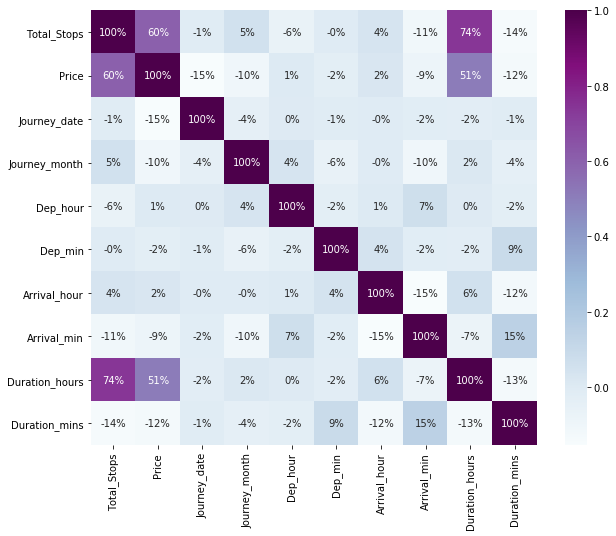

In [59]:
plt.figure(figsize=(10,8))
sns.heatmap(Train_data.corr(),annot=True,fmt='.0%',cmap='BuPu')
plt.show()

Text(0.5, 1.0, 'Corrlation with target variable')

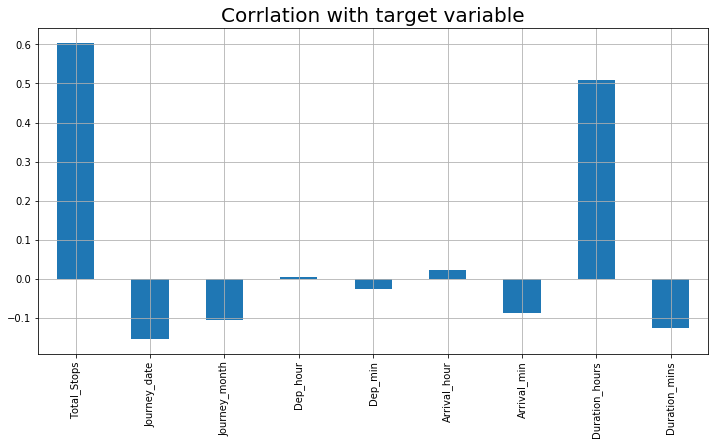

In [60]:
# Correlation with target column
plt.figure(figsize=(12,6))
Train_data.drop('Price',axis=1).corrwith(Train_data['Price']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Corrlation with target variable",fontsize=20)

# Removing outliers

In [62]:
from scipy.stats import zscore
z_score=abs(zscore(train))
print(train.shape)
train_new=train.loc[(z_score<3).all(axis=1)]
print(train_new.shape)
# All outliers have been removed.

(10682, 30)
(7506, 30)


In [63]:
train=train_new
train.shape

(7506, 30)

# Feature Selection

In [64]:
train.shape

(7506, 30)

In [65]:
train.columns

Index(['Total_Stops', 'Price', 'Journey_date', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [66]:
#Splitting the data into input and output variable.
x=train.drop(columns=['Price'],axis=1)
x.head()

,Total_Stops,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,1,27,5,11,25,19,15,7,50,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
10,1,1,6,9,45,23,0,13,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [67]:
y=train['Price']
y.head()

1      7662
2     13882
3      6218
9      8625
10     8907
Name: Price, dtype: int64

In [68]:
#Checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(7506, 29) 		 (7506,)


In [69]:
# Scaling the input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [70]:
# Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [71]:
# Checking the shape
print(x_train.shape,'\t\t',x_test.shape)

(6004, 29) 		 (1502, 29)


In [72]:
# Checking the shape
print(y_train.shape,'\t\t',y_test.shape)

(6004,) 		 (1502,)


In [73]:
# Importing our Models Library
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Importing Error Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [75]:
# Using algorithms via for loop

model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m, 'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print('r2_score:',r2_score(y_test,predm))
    print('**************************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 0.5855939208641614
Error:
Mean absolute error: 1921.1783992373928
Mean squared error: 6029142.366943668
Root Mean Squared Error: 2455.43119776215
r2_score: 0.5664153318143346
**************************************************************************************************


Score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is: 0.9401370943283063
Error:
Mean absolute error: 1414.1526076342655
Mean squared error: 5080771.958963789
Root Mean Squared Error: 2254.056778114471
r2_score: 0.6346172158692813
*****************************************

In [76]:
# Cross validating the models
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    score=cross_val_score(m,x,y,cv=4,scoring='r2')
    print('Score of',m,'is:')
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('Standard deviation:',score.std())
    print('*************************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is:
Score: [0.57057711 0.58177733 0.5719733  0.59710777]
Mean Score: 0.5803588775696757
Standard deviation: 0.010589362460827308
*************************************************************************************************


Score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is:
Score: [0.64868818 0.62434054 0.63321059 0.616807  ]
Mean Score: 0.6307615755540609
Standard deviation: 0.0118671886432021
*************************************************************************************************


Score of KNeighborsRegressor(algorithm='auto'

# Random Forest Regressor is giving the best score and r2 score so I choose RFC as final model.

Using GridSearchCV to find the best parameters

In [77]:
parameters={'n_estimators':[400,500,600,700],'max_depth':[4,5,6,15,20]}
RFR=RandomForestRegressor()

clf=GridSearchCV(RFR,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 15, 'n_estimators': 400}


In [78]:
# Using RandomForestRegressor wiith its best parameters

rf=RandomForestRegressor(n_estimators=400, min_samples_split=15, min_samples_leaf=1, max_features='auto', max_depth=20)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
y_pred=rf.predict(x_test)
print('\n')
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print("r2_score",r2_score(y_test,y_pred))
print('\n')

Score: 0.876142863962701


Mean Absolute Error: 1197.7328301750956
Mean Squared Error 2688191.7413347615
Root Mean Squared Error: 1639.5705966303376


r2_score 0.8066791836635745




# Now R2 score increases

# Before Hyperparameter Tuning-----r2_score is : 0.75

# After Hyperparameter Tuning-----r2_score: 0.80

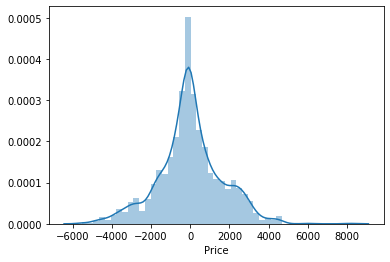

In [79]:
# Plotting the distribution plot to find the gaussian plot

sns.distplot(y_test-y_pred)
plt.show()

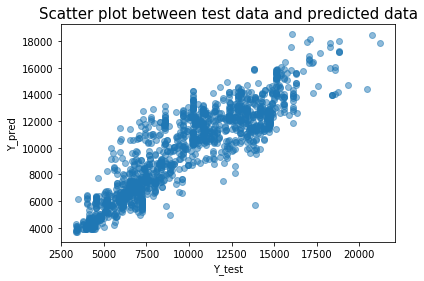

In [80]:
#Scatter plot between test data and prediction
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between test data and predicted data",fontsize=15)
plt.show()

In [81]:
#Saving the model

#Importing joblib
from sklearn.externals import joblib

#saving the model as a pickle in a file
joblib.dump(rf,'Flight_Fare_Prediction_rf.pkl')

['Flight_Fare_Prediction_rf.pkl']